# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
print(app_train[['AMT_INCOME_TOTAL','TARGET']].sort_values(by='AMT_INCOME_TOTAL'))

        AMT_INCOME_TOTAL  TARGET
1678             25650.0       0
20727            25650.0       1
240137           26100.0       0
186643           26100.0       0
246104           26100.0       0
132707           26460.0       0
262748           26550.0       0
175433           26550.0       0
4735             27000.0       0
187572           27000.0       0
292142           27000.0       0
124146           27000.0       0
125059           27000.0       0
10585            27000.0       0
62585            27000.0       0
173546           27000.0       0
83674            27000.0       0
267037           27000.0       0
90900            27000.0       0
277924           27000.0       0
232535           27000.0       0
163569           27000.0       0
133737           27000.0       0
299307           27000.0       0
205513           27000.0       0
162772           27000.0       0
239654           27000.0       0
199006           27000.0       0
36856            27000.0       0
293194    

In [6]:
# 將117000000視為outlier
outlier = app_train['AMT_INCOME_TOTAL'].max()
print(outlier)

117000000.0


In [7]:
app_train.loc[app_train['AMT_INCOME_TOTAL'] == outlier,'AMT_INCOME_TOTAL'] = np.median(app_train['AMT_INCOME_TOTAL'])
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.684179e+05
std      1.088116e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

In [8]:
app_train['AMT_INCOME_TOTAL_WID_GROUPED'] = pd.cut(app_train['AMT_INCOME_TOTAL'], 4)
app_train['AMT_INCOME_TOTAL_QTY_GROUPED'] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 4)
appmin = app_train['AMT_INCOME_TOTAL'].min()
appmax = app_train['AMT_INCOME_TOTAL'].max()
appstd = app_train['AMT_INCOME_TOTAL'].std()
appbin = [appmin - 1, appmin + appstd, appmin + appstd * 2, appmin + appstd * 3, appmax]
app_train['AMT_INCOME_TOTAL_CSM_GROUPED'] = pd.cut(app_train['AMT_INCOME_TOTAL'], bins=appbin)
print(app_train['AMT_INCOME_TOTAL_WID_GROUPED'].value_counts())
print('-------------------')
print(app_train['AMT_INCOME_TOTAL_QTY_GROUPED'].value_counts())
print('-------------------')
print(app_train['AMT_INCOME_TOTAL_CSM_GROUPED'].value_counts())

(7675.56, 4519260.0]        307507
(4519260.0, 9012870.0]           2
(13506480.0, 18000090.0]         1
(9012870.0, 13506480.0]          1
Name: AMT_INCOME_TOTAL_WID_GROUPED, dtype: int64
-------------------
(25649.999, 112500.0]     100578
(147150.0, 202500.0]       82213
(202500.0, 18000090.0]     71537
(112500.0, 147150.0]       53183
Name: AMT_INCOME_TOTAL_QTY_GROUPED, dtype: int64
-------------------
(134461.637, 243273.274]    148681
(25649.0, 134461.637]       113670
(243273.274, 352084.912]     31474
(352084.912, 18000090.0]     13686
Name: AMT_INCOME_TOTAL_CSM_GROUPED, dtype: int64


AMT_INCOME_TOTAL_WID_GROUPED  TARGET
(7675.56, 4519260.0]          0         1.689130e+05
                              1         1.609047e+05
(4519260.0, 9012870.0]        0         7.875000e+06
(9012870.0, 13506480.0]       0         1.350000e+07
(13506480.0, 18000090.0]      0         1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64
AMT_INCOME_TOTAL_WID_GROUPED  TARGET
(7675.56, 4519260.0]          0         282682
                              1          24825
(4519260.0, 9012870.0]        0              2
(9012870.0, 13506480.0]       0              1
(13506480.0, 18000090.0]      0              1
Name: AMT_INCOME_TOTAL, dtype: int64


<Figure size 1152x1440 with 0 Axes>

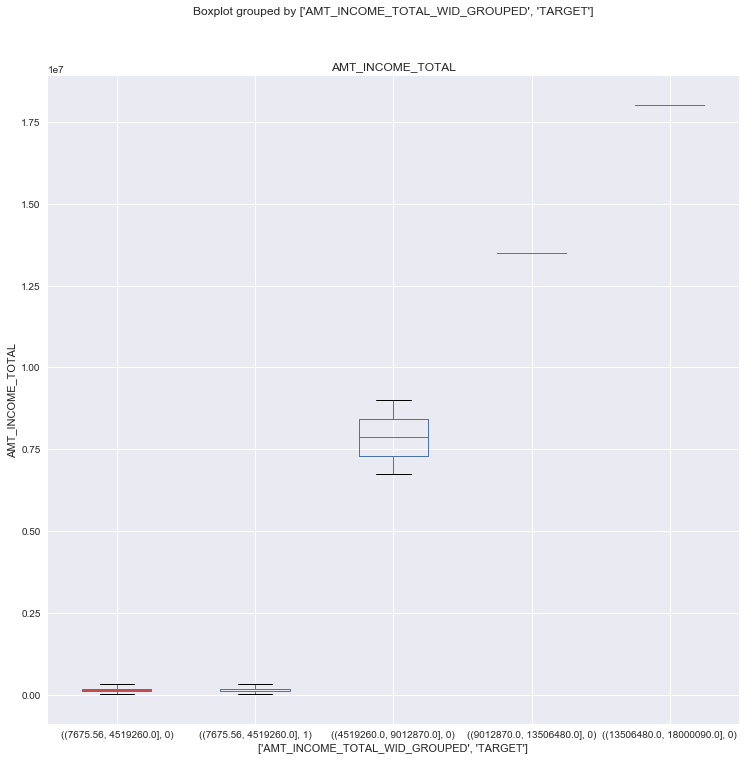

AMT_INCOME_TOTAL_QTY_GROUPED  TARGET
(25649.999, 112500.0]         0          90202.630670
                              1          91037.864799
(112500.0, 147150.0]          0         132766.978305
                              1         132652.115580
(147150.0, 202500.0]          0         175664.816375
                              1         175133.160026
(202500.0, 18000090.0]        0         297276.717080
                              1         286337.930190
Name: AMT_INCOME_TOTAL, dtype: float64
AMT_INCOME_TOTAL_QTY_GROUPED  TARGET
(25649.999, 112500.0]         0         92135
                              1          8443
(112500.0, 147150.0]          0         48645
                              1          4538
(147150.0, 202500.0]          0         75311
                              1          6902
(202500.0, 18000090.0]        0         66595
                              1          4942
Name: AMT_INCOME_TOTAL, dtype: int64


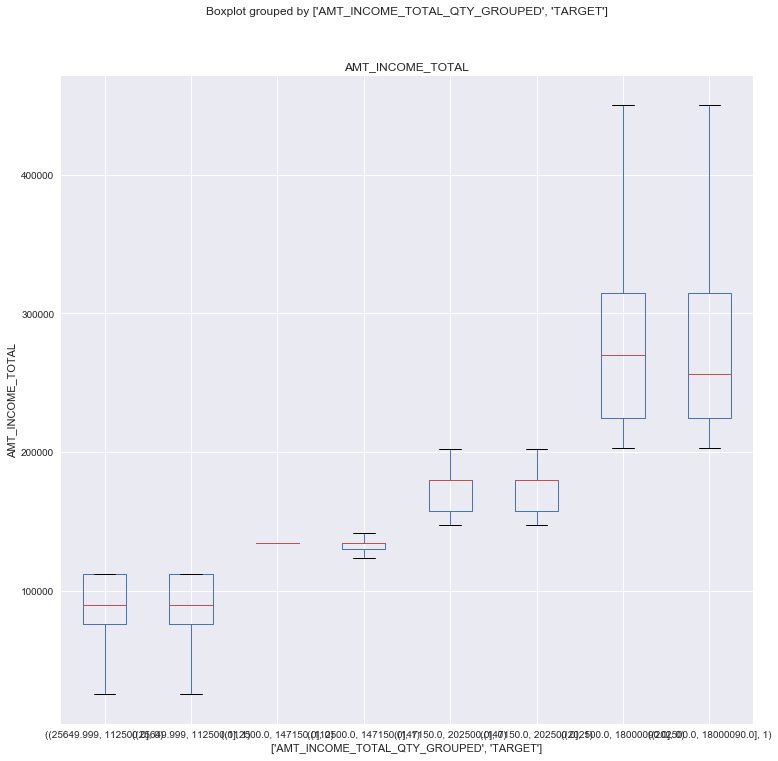

AMT_INCOME_TOTAL_CSM_GROUPED  TARGET
(25649.0, 134461.637]         0          93993.151359
                              1          94921.790786
(134461.637, 243273.274]      0         173623.850731
                              1         172372.876037
(243273.274, 352084.912]      0         282922.634247
                              1         281433.103230
(352084.912, 18000090.0]      0         467995.100194
                              1         457344.532746
Name: AMT_INCOME_TOTAL, dtype: float64
AMT_INCOME_TOTAL_CSM_GROUPED  TARGET
(25649.0, 134461.637]         0         104065
                              1           9605
(134461.637, 243273.274]      0         136391
                              1          12290
(243273.274, 352084.912]      0          29338
                              1           2136
(352084.912, 18000090.0]      0          12892
                              1            794
Name: AMT_INCOME_TOTAL, dtype: int64


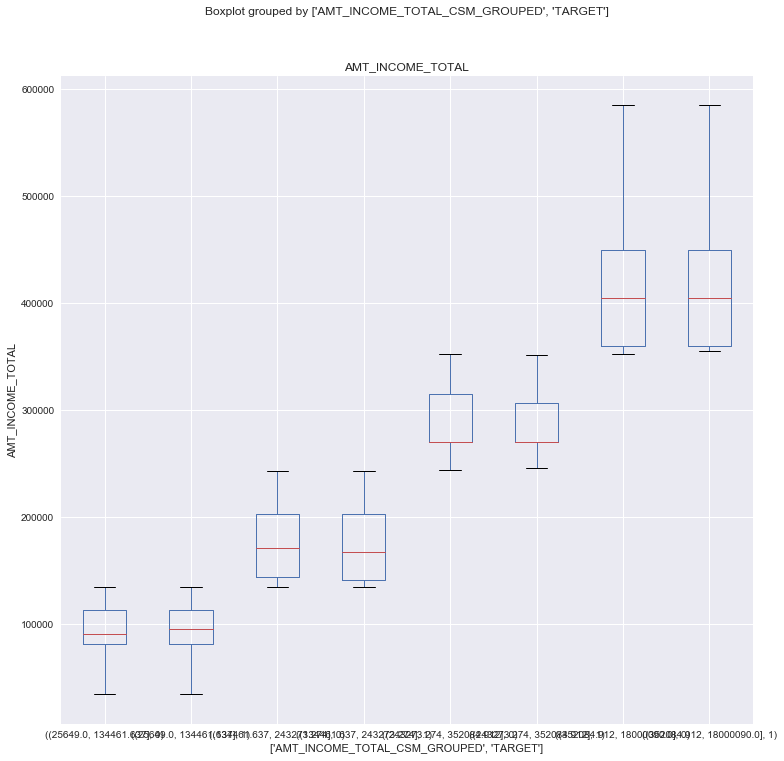

In [9]:
grpw = ['AMT_INCOME_TOTAL_WID_GROUPED','TARGET']
grpq = ['AMT_INCOME_TOTAL_QTY_GROUPED','TARGET']
grpc = ['AMT_INCOME_TOTAL_CSM_GROUPED','TARGET']

groupedw_df = app_train.groupby(grpw)['AMT_INCOME_TOTAL']
groupedq_df = app_train.groupby(grpq)['AMT_INCOME_TOTAL']
groupedc_df = app_train.groupby(grpc)['AMT_INCOME_TOTAL']

print(groupedw_df.mean())
print(groupedw_df.size())
plt.figure(figsize=(16,20))
plt.style.use('seaborn')
plt_column = 'AMT_INCOME_TOTAL'
plt_by  = grpw
app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.xlabel(plt_by)
plt.ylabel(plt_column)
plt.show()

print(groupedq_df.mean())
print(groupedq_df.size())
plt_by  = grpq
app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.xlabel(plt_by)
plt.ylabel(plt_column)
plt.show()

print(groupedc_df.mean())
print(groupedc_df.size())
plt_by  = grpc
app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.xlabel(plt_by)
plt.ylabel(plt_column)
plt.show()


感覺在數值分佈不太均勻時，用等寬劃分需要比較對資料做比較多處理才好用